## Access Satellite GHRSST L3C 1Day night time Himawari8 data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_ghrsst_l3c_1day_nighttime_himawari8 dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/72b65fb8-84e1-4a56-b32c-7f15970903d2).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_ghrsst_l3c_1day_nighttime_himawari8.ipynb).

In [1]:
dataset_name = "satellite_ghrsst_l3c_1day_nighttime_himawari8"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.11 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Using Python 3.12.11 environment at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised
Audited 256 packages in 131ms


✅ Local version 0.2.4 is up to date (remote: 0.2.4)


In [3]:
from DataQuery import GetAodn

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2989: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


# Understanding the Dataset

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 608 ms, sys: 135 ms, total: 742 ms
Wall time: 7.54 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	time = 2656 ;
	lat = 4500 ;
	lon = 6000 ;

variables:
	int32 crs(time) ;
		crs:epsg_code = EPSG:4326 ;
		crs:grid_mapping_name = latitude_longitude ;
		crs:inverse_flattening = 298.257223563 ;
		crs:long_name = coordinate reference system ;
		crs:semi_major_axis = 6379137.0 ;
	float64 dt_analysis(time, lat, lon) ;
		dt_analysis:comment = The difference between this SST and the previous day's L4 Foundation SST. ;
		dt_analysis:grid_mapping = crs ;
		dt_analysis:long_name = deviation from last SST analysis ;
		dt_analysis:source = ABOM-L4LRfnd-GLOB-GAMSSA_28km ;
		dt_analysis:units = Kelvin ;
		dt_analysis:valid_max = 127 ;
		dt_analysis:valid_min = -127 ;
	<U59 filename(time) ;
	float64 l2p_flags(time, lat, lon) ;
		l2p_flags:comment = These flags are important to properly use the data.  Data not flagged as microwave are sourced from an infrared sensor. The lake and river flags are currently not set, but defined in GDS2.0r4. The terminator flag indicates th

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2015-09-01 14:39:59'), Timestamp('2022-12-12 14:39:59'))

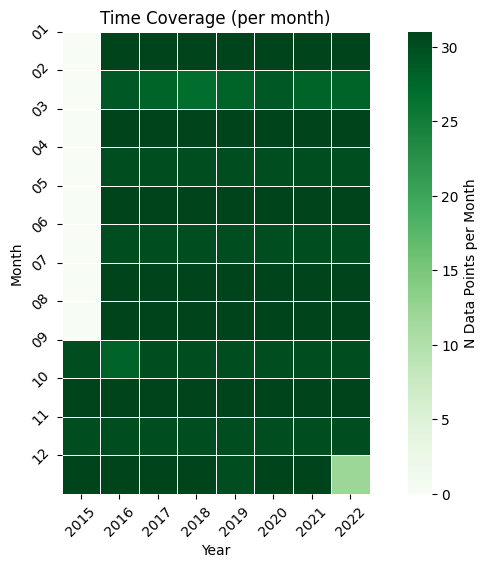

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='sea_surface_temperature', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2017-01-01', 
                                                  date_end='2017-12-31', 
                                                  )

CPU times: user 2.88 s, sys: 731 ms, total: 3.61 s
Wall time: 14 s


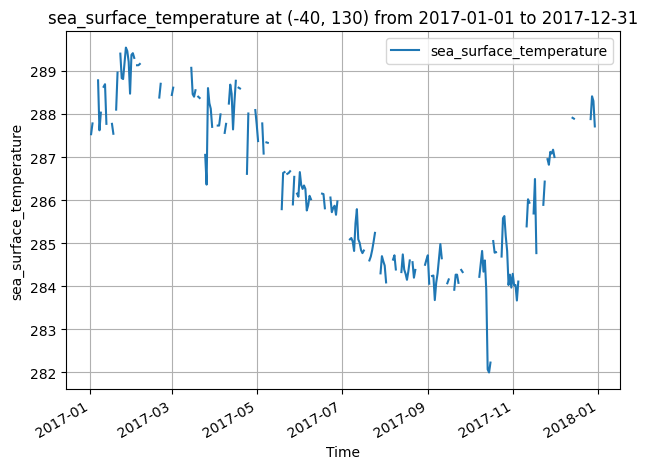

CPU times: user 2.48 s, sys: 797 ms, total: 3.27 s
Wall time: 13.4 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_timeseries(var_name='sea_surface_temperature', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2017-01-01', 
                                                  date_end='2017-12-31', 
                                                  )

## Plot a gridded variable

2025-08-11 17:23:02,187 - aodn.GetAodn - INFO - Plotting 'sea surface skin temperature' for 6 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2591: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


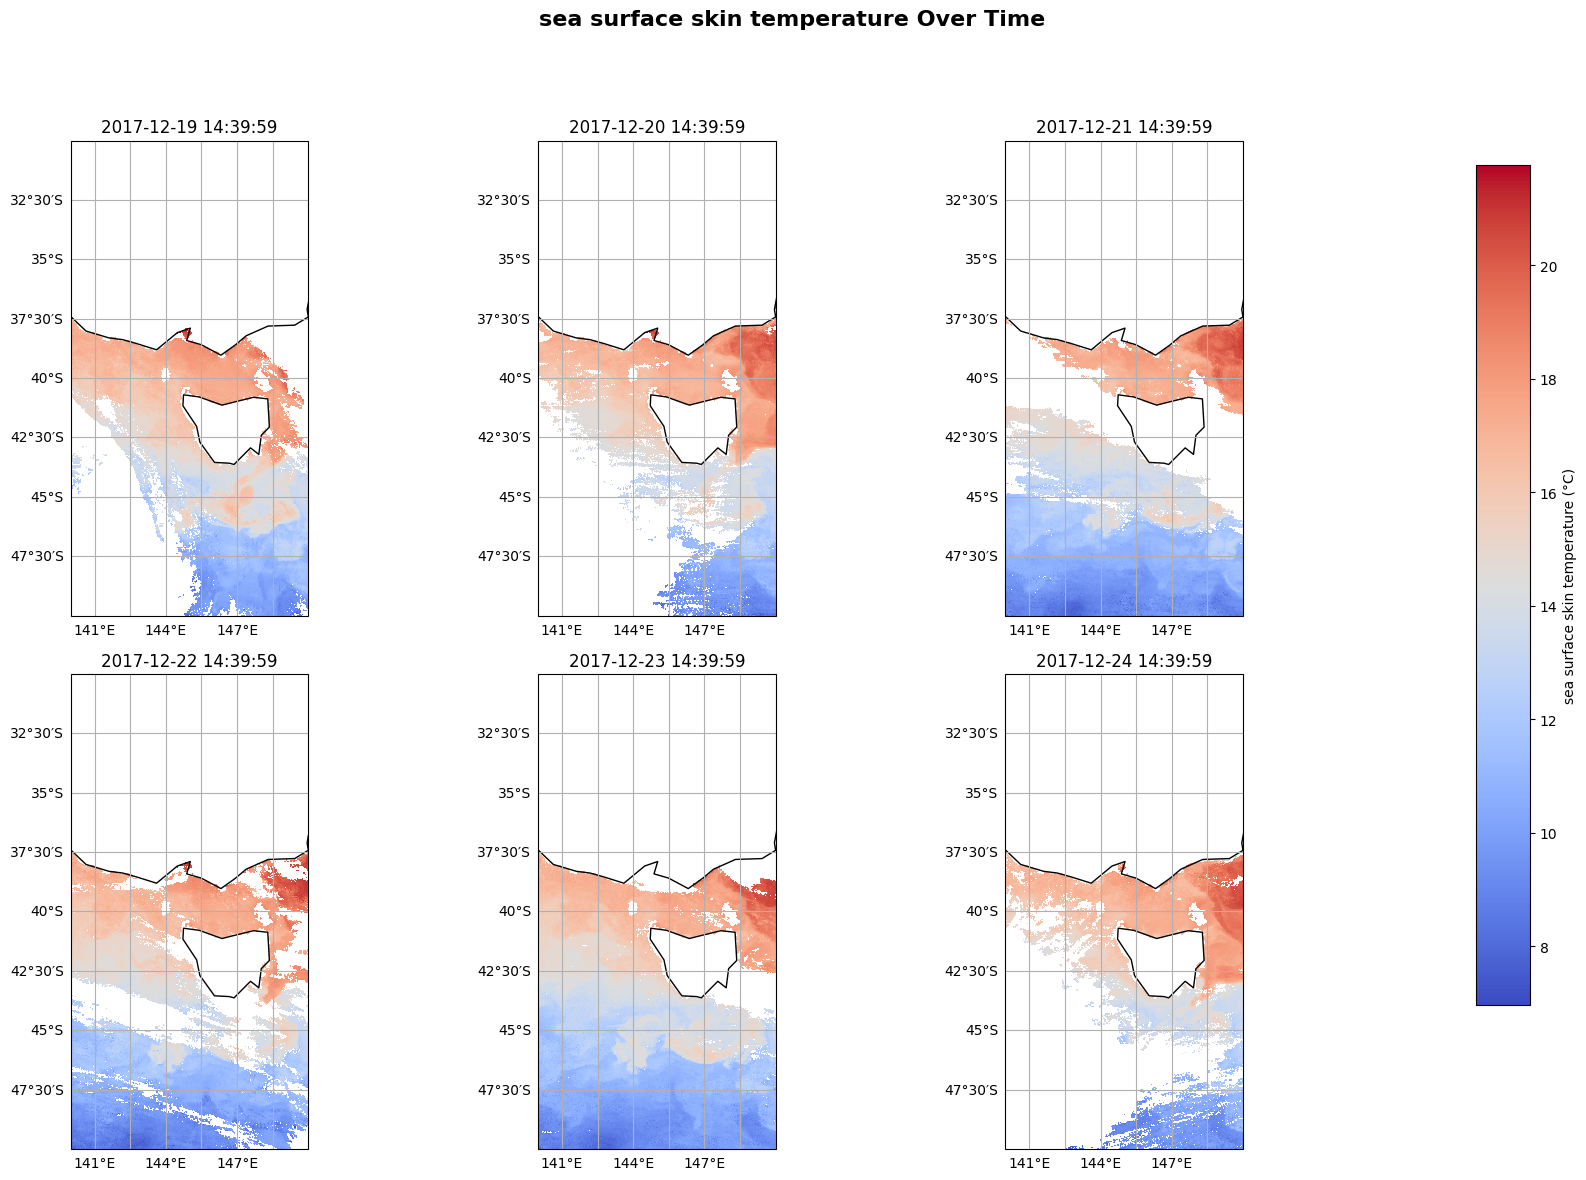

CPU times: user 3.91 s, sys: 2.77 s, total: 6.68 s
Wall time: 9.28 s


In [10]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sea_surface_temperature', 
                                                    date_start='2017-12-20',            
                                                    lon_slice=(140, 150),
                                                    lat_slice=(-50, -30),
                                                    n_days=6, 
                                                    coastline_resolution="110m", 
                                                    )